In [12]:
import os
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import glob
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.cluster import KMeans
import tensorflow as tf
from sklearn.svm import LinearSVC
from skimage import feature
import numpy as np
from skimage import feature
import numpy as np
numPoints=24
radius=6
eps=1e-7

In [3]:
cancer_image=[]
labels=[]
n=100
for cancer_dir_path in glob.glob("/home/rishotics/sawon/data/*"):
    cancer_label=cancer_dir_path.split("/")[-1]
    
    path="/home/rishotics/sawon/data/"+cancer_label+"/40X/*"
    c=0
    for cancer_dir_path_res in glob.glob(path):
        
        if(c==n):
            break
        else:
            image=cv.imread(cancer_dir_path_res,-1)
            image = cv.resize(image, (460,700))
            image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
            labels.append(cancer_label)
            cancer_image.append(image)
            c=c+1
            
        
        
cancer_image=np.array(cancer_image)
labels=np.array(labels)
cancer_to_dict={i:k for k,i in enumerate(np.unique(labels))}
dict_to_id={i:k for k,i in cancer_to_dict.items()}
label_id=np.array([cancer_to_dict[x] for x in labels])
        
    

In [19]:
LBP_features(cancer_image[1])

count    26.000000
mean      0.038462
std       0.124834
min       0.003261
25%       0.004745
50%       0.006792
75%       0.021078
max       0.645599
dtype: float64

In [10]:
data = []
labels = []

def LBP_features(image):
    #gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    
    
    
    lbp = feature.local_binary_pattern(image, numPoints,radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),bins=np.arange(0, numPoints + 3),
    range=(0, numPoints + 2))
 
		# normalize the histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + eps)
   # hist = hist.describe()
    return (pd.Series(hist).describe())

In [36]:
j=0
data=np.zeros((cancer_image.shape[0],8+1))
m=0
for i in cancer_image:
    
    
    
    lbp_features=LBP_features(i)
    
    data[j,0:8]=lbp_features
    data[j,8]=label_id[j]
    
    j=j+1



(200, 8)

Text(0,0.5,'Accuracy')

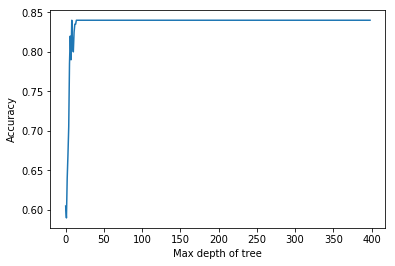

In [77]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
r=[]
X=np.float64(data[:,0:8])
Y=np.float64(label_id)



for i in range(1,400):
    clf = RandomForestClassifier(n_estimators=2, max_depth=i,
                             random_state=0)
    clf.fit(X, Y)
    r.append(clf.score(X,Y))
    
plt.plot(r)
plt.xlabel("Max depth of tree")
plt.ylabel("Accuracy")
#clf.fit(X_train,y_train) 

In [63]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)
clf.fit(X, y)

TypeError: a float is required

In [54]:
X_train

array([[2.60000000e+01, 3.84615399e-02, 1.09123498e-01, ...,
        1.06552793e-02, 2.54262425e-02, 5.68940997e-01],
       [2.60000000e+01, 3.84615399e-02, 1.24833509e-01, ...,
        6.79192552e-03, 2.10784171e-02, 6.45599365e-01],
       [2.60000000e+01, 3.84615399e-02, 1.26684874e-01, ...,
        5.11645945e-03, 2.17267089e-02, 6.54083848e-01],
       ...,
       [2.60000000e+01, 3.84615399e-02, 1.23841591e-01, ...,
        6.19254680e-03, 2.25970503e-02, 6.39875770e-01],
       [2.60000000e+01, 3.84615399e-02, 1.24718189e-01, ...,
        4.64130426e-03, 2.40349378e-02, 6.43149078e-01],
       [2.60000000e+01, 3.84615399e-02, 1.24713846e-01, ...,
        6.44875783e-03, 2.24200319e-02, 6.44742250e-01]], dtype=float32)

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,    11,    20,    53,    60,
         100,   132,    93,   102,    84,    77,    80,    97,    96,
         124,   106,    96,    84,   101,   114,   106,   135,   129,
         148,   169,   169,   176,   204,   236,   267,   294,   320,
         347,   368,

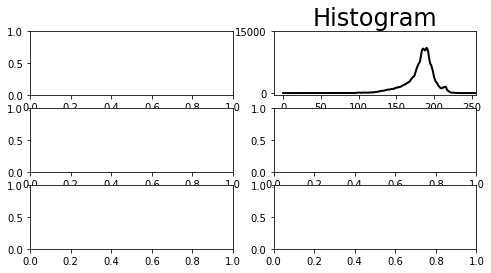

In [3]:
image=cancer_image[1]
fig, axes = plt.subplots(ncols=2, nrows=3,
                         figsize=(8, 4))
ax0, ax1, ax2, ax3, ax4, ax5  = axes.flat
values, bins = np.histogram(cancer_image[1],
                            bins=np.arange(256))
ax1.plot(bins[:-1], values, lw=2, c='k')
ax1.set_xlim(xmax=256)
ax1.set_yticks([0, 15000])
ax1.set_title('Histogram', fontsize=24)
values

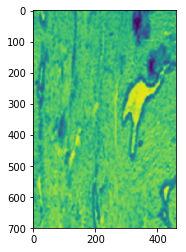

In [18]:
# Apply threshold.
from skimage import filters
ax0, ax1, ax2, ax3, ax4, ax5  = axes.flat

bw = filters.threshold_local(image,17, offset=-15)

plt.imshow(bw)



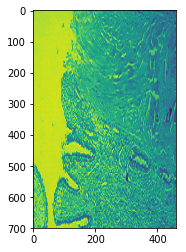

In [28]:
plt.imshow(cancer_image[4])


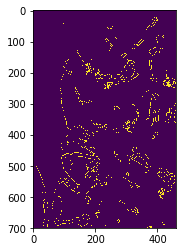

In [11]:
from skimage import feature

edges = feature.canny(cancer_image[4], sigma=3,
                     low_threshold=0,
                     high_threshold=31)
ax4.imshow(edges, cmap=plt.cm.gray)
ax4.set_title('Edges', fontsize=24)
ax4.axis('off')
plt.imshow(edges)



In [9]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
def nothing(x):
    pass
cv2.namedWindow('Colorbars')
hh='Max'
hl='Min'
wnd = 'Colorbars'
cv2.createTrackbar("Max", "Colorbars",0,255,nothing)
cv2.createTrackbar("Min", "Colorbars",0,255,nothing)

# titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
# images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
# for i in xrange(6):
#     plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
#     plt.title(titles[i])
#     plt.xticks([]),plt.yticks([])
# plt.show()
while(1):
    hul=cv2.getTrackbarPos("Max", "Colorbars")
    huh=cv2.getTrackbarPos("Min", "Colorbars")
    
    edges = cv2.Canny(image,hul,huh)
    # cv2.imshow(wnd)
    cv2.imshow("edges",edges)
    
    k = cv2.waitKey(0) & 0xFF
    if k == ord('m'):
      mode = not mode
    elif k == 27:
      break
cv2.destroyAllWindows()

In [1]:
patch_array=[]
thresh = threshold_otsu(image)
bw = closing(image < thresh, square(2))
cleared = clear_border(bw)
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 90:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        patch=image[minr:maxr,minc:maxc]
        patch_array.append(patch)

ax.set_axis_off()
plt.tight_layout()
plt.show()
plt.imshow(bw)


NameError: name 'threshold_otsu' is not defined

In [6]:
cancer_image.shape

(200, 700, 460)

In [15]:
from sklearn.manifold import Isomap
import pandas as pd
adenosis=pd.read_csv("adenosis_40X.csv",)
model = Isomap(n_components=2)
proj = model.fit_transform(adenosis)
proj.shape

(683, 2)

NameError: name 'target' is not defined

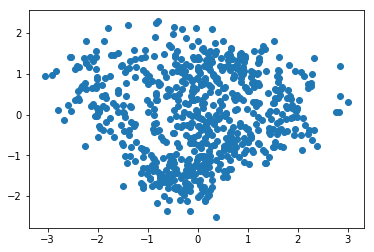

In [17]:
plt.scatter(proj[:, 0], proj[:, 1],  cmap=plt.cm.get_cmap('jet', 10))
plt.clim(-0.5, 9.5);

In [167]:
i=0
X=[]
j=0

Y= np.zeros([6773,]) 
for data_dir_path in glob.glob("/home/rishotics/sawon/LBP_done_data/*"):
    
    data=pd.read_csv(data_dir_path)
    X.append(data)
    print(data.shape[0])
    Y[i:i+data.shape[0]]=j
    print(Y[i+data.shape[0]-1])
    i=i+data.shape[0]
    j=j+1
Y.shape

893
0.0
683
1.0
1511
2.0
869
3.0
1229
4.0
653
5.0
935
6.0


(6773,)

In [168]:
from pylmnn import LargeMarginNearestNeighbor as LMNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import random




j=0
s=0
i=0
X=[]
j=0
X=[]
r=0
for data_dir_path in glob.glob("/home/rishotics/sawon/LBP_done_data/*"):

    data=pd.read_csv(data_dir_path)
    X.append(data)

X=np.concatenate(X)
X=np.array(X)
   
X.shape

(6773, 531)

In [169]:

X.shape   
X=X[:,:]
y=Y[:]
print(y)
# Split in training and testing set

print(X.shape)
print(y.shape)
# Set up the hyperparameters
k_train, k_test, n_components, max_iter = 3, 3, X.shape[1], 180

# Instantiate the metric learner
lmnn = LMNN(n_neighbors=k_train, max_iter=max_iter, n_components=n_components)

# Train the metric learner
X.shape
lmnn.fit(X, y)

# Fit the nearest neighbors classifier
knn = KNeighborsClassifier(n_neighbors=k_test)
knn.fit(lmnn.transform(X), y)

# Compute the k-nearest neighbor test accuracy after applying the learned transformation
lmnn_acc = knn.score(lmnn.transform(X), y)
print('LMNN accuracy on test set of {} points: {:.4f}'.format(X.shape[0], lmnn_acc))





[0. 0. 0. ... 6. 6. 6.]
(6773, 531)
(6773,)
LMNN accuracy on test set of 6773 points: 0.6443


In [171]:
w=knn.predict(lmnn.transform(X))

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [7, 6773]

In [147]:
for 

0